In [ ]:
!nvidia-smi


Mon Sep 11 06:21:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    42W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 26.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet



from roboflow import Roboflow
rf = Roboflow(api_key="EX21p6P3sYw3SwyBkyQQ")
project = rf.workspace("martin-rpfil").project("is_it_damaged")
dataset = project.version(8).download("yolov8")




/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to is_it_damaged-8 in yolov8:: 100%|██████████| 19174/19174 [00:03<00:00, 5776.57it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 432MB/s]
New https://pypi.org/project/ultralytics/8.0.175 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/is_it_damaged-8/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, 

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch47160.jpg
events.out.tfevents.1694413912.5a5458ec420b.2994.0  train_batch47161.jpg
F1_curve.png					    train_batch47162.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


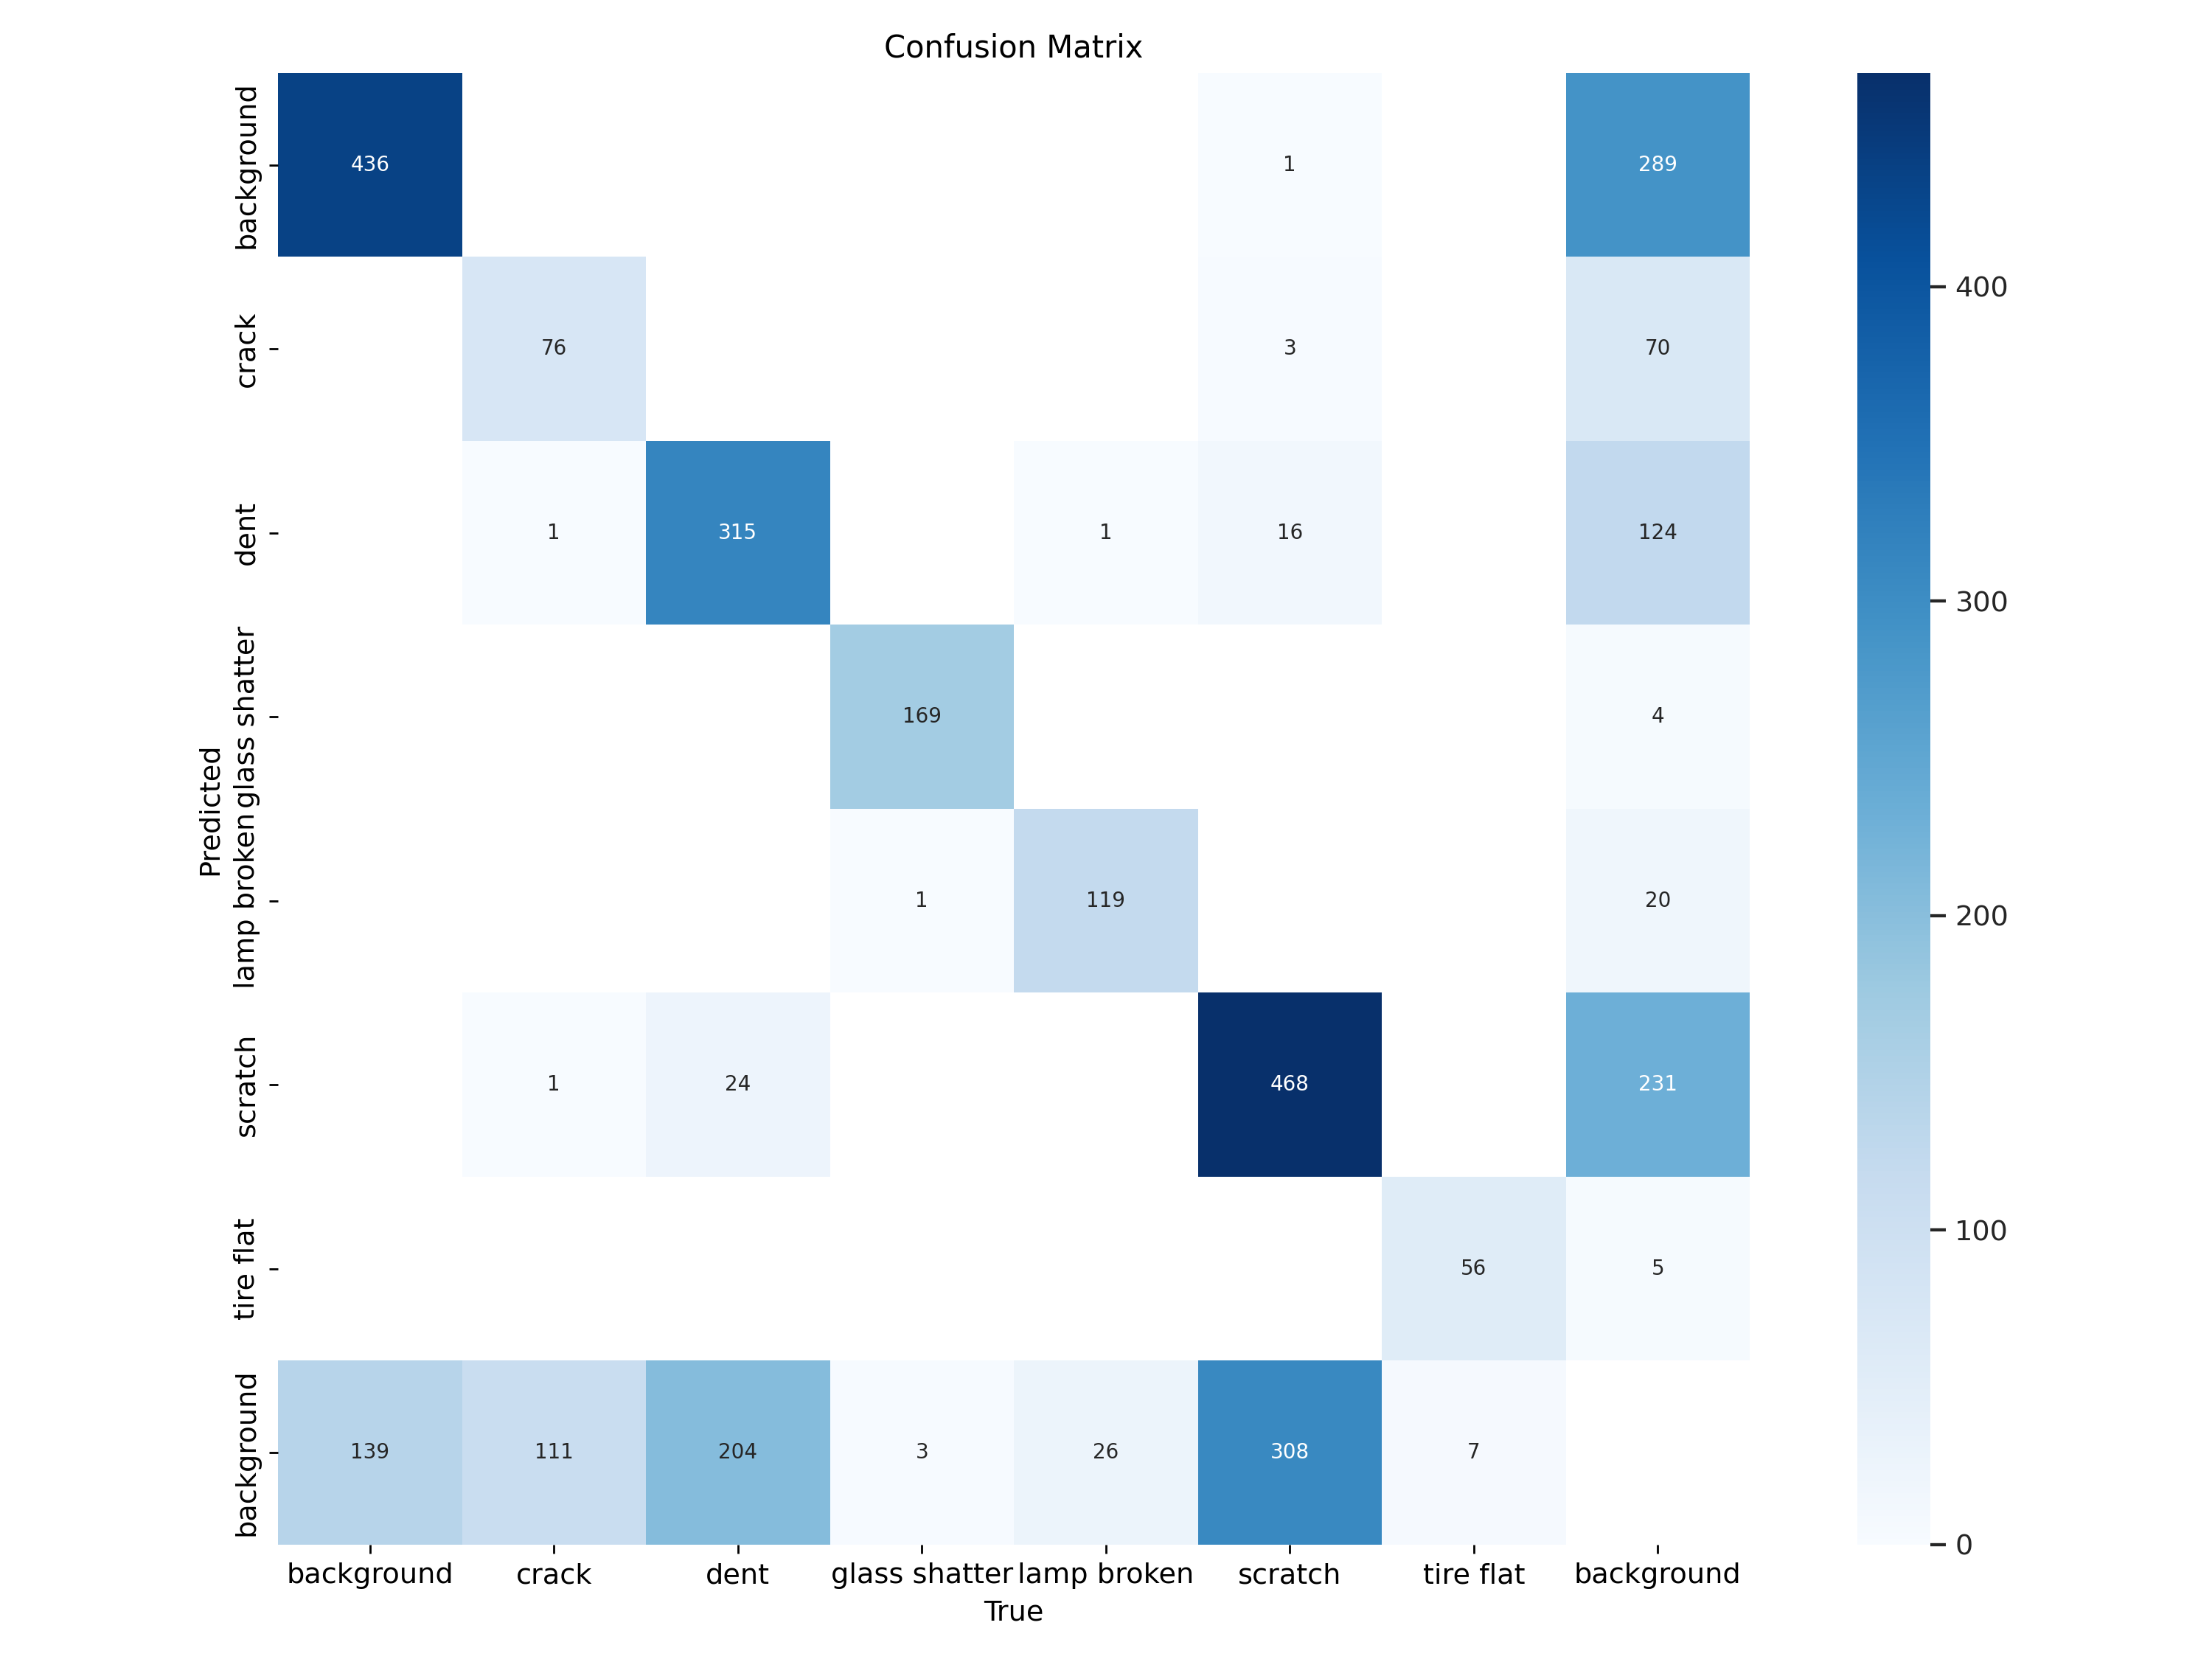

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


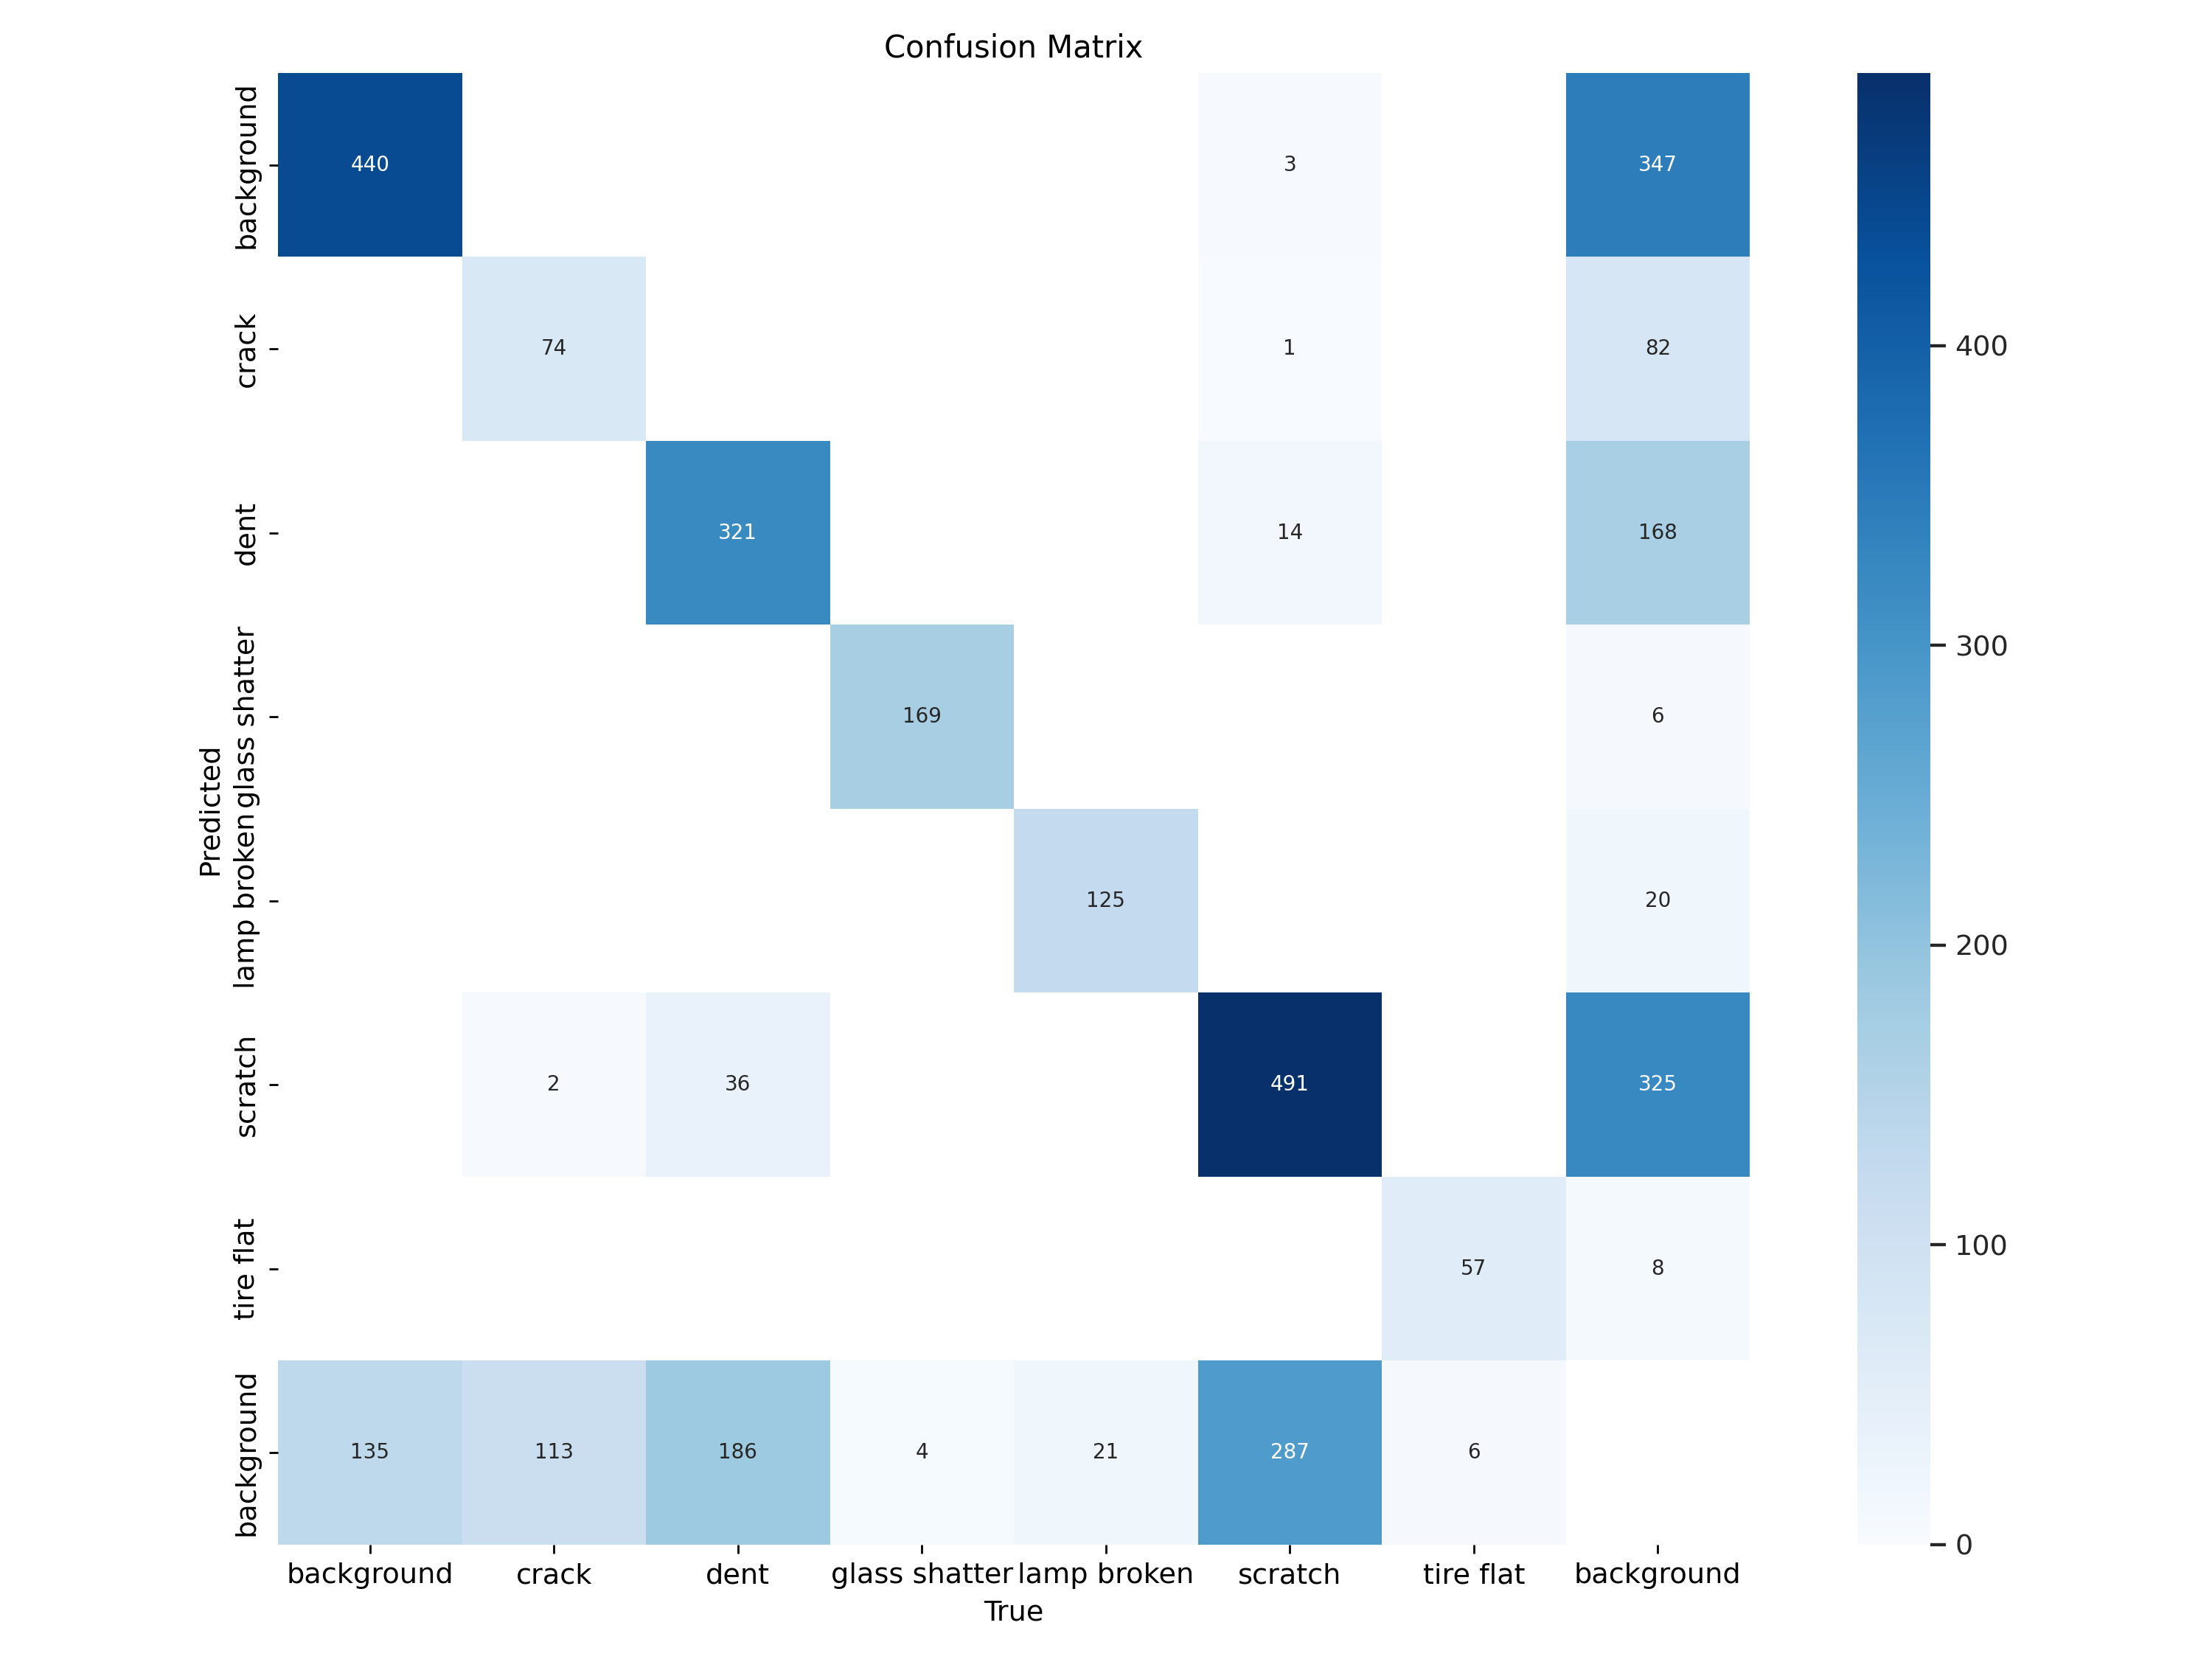

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


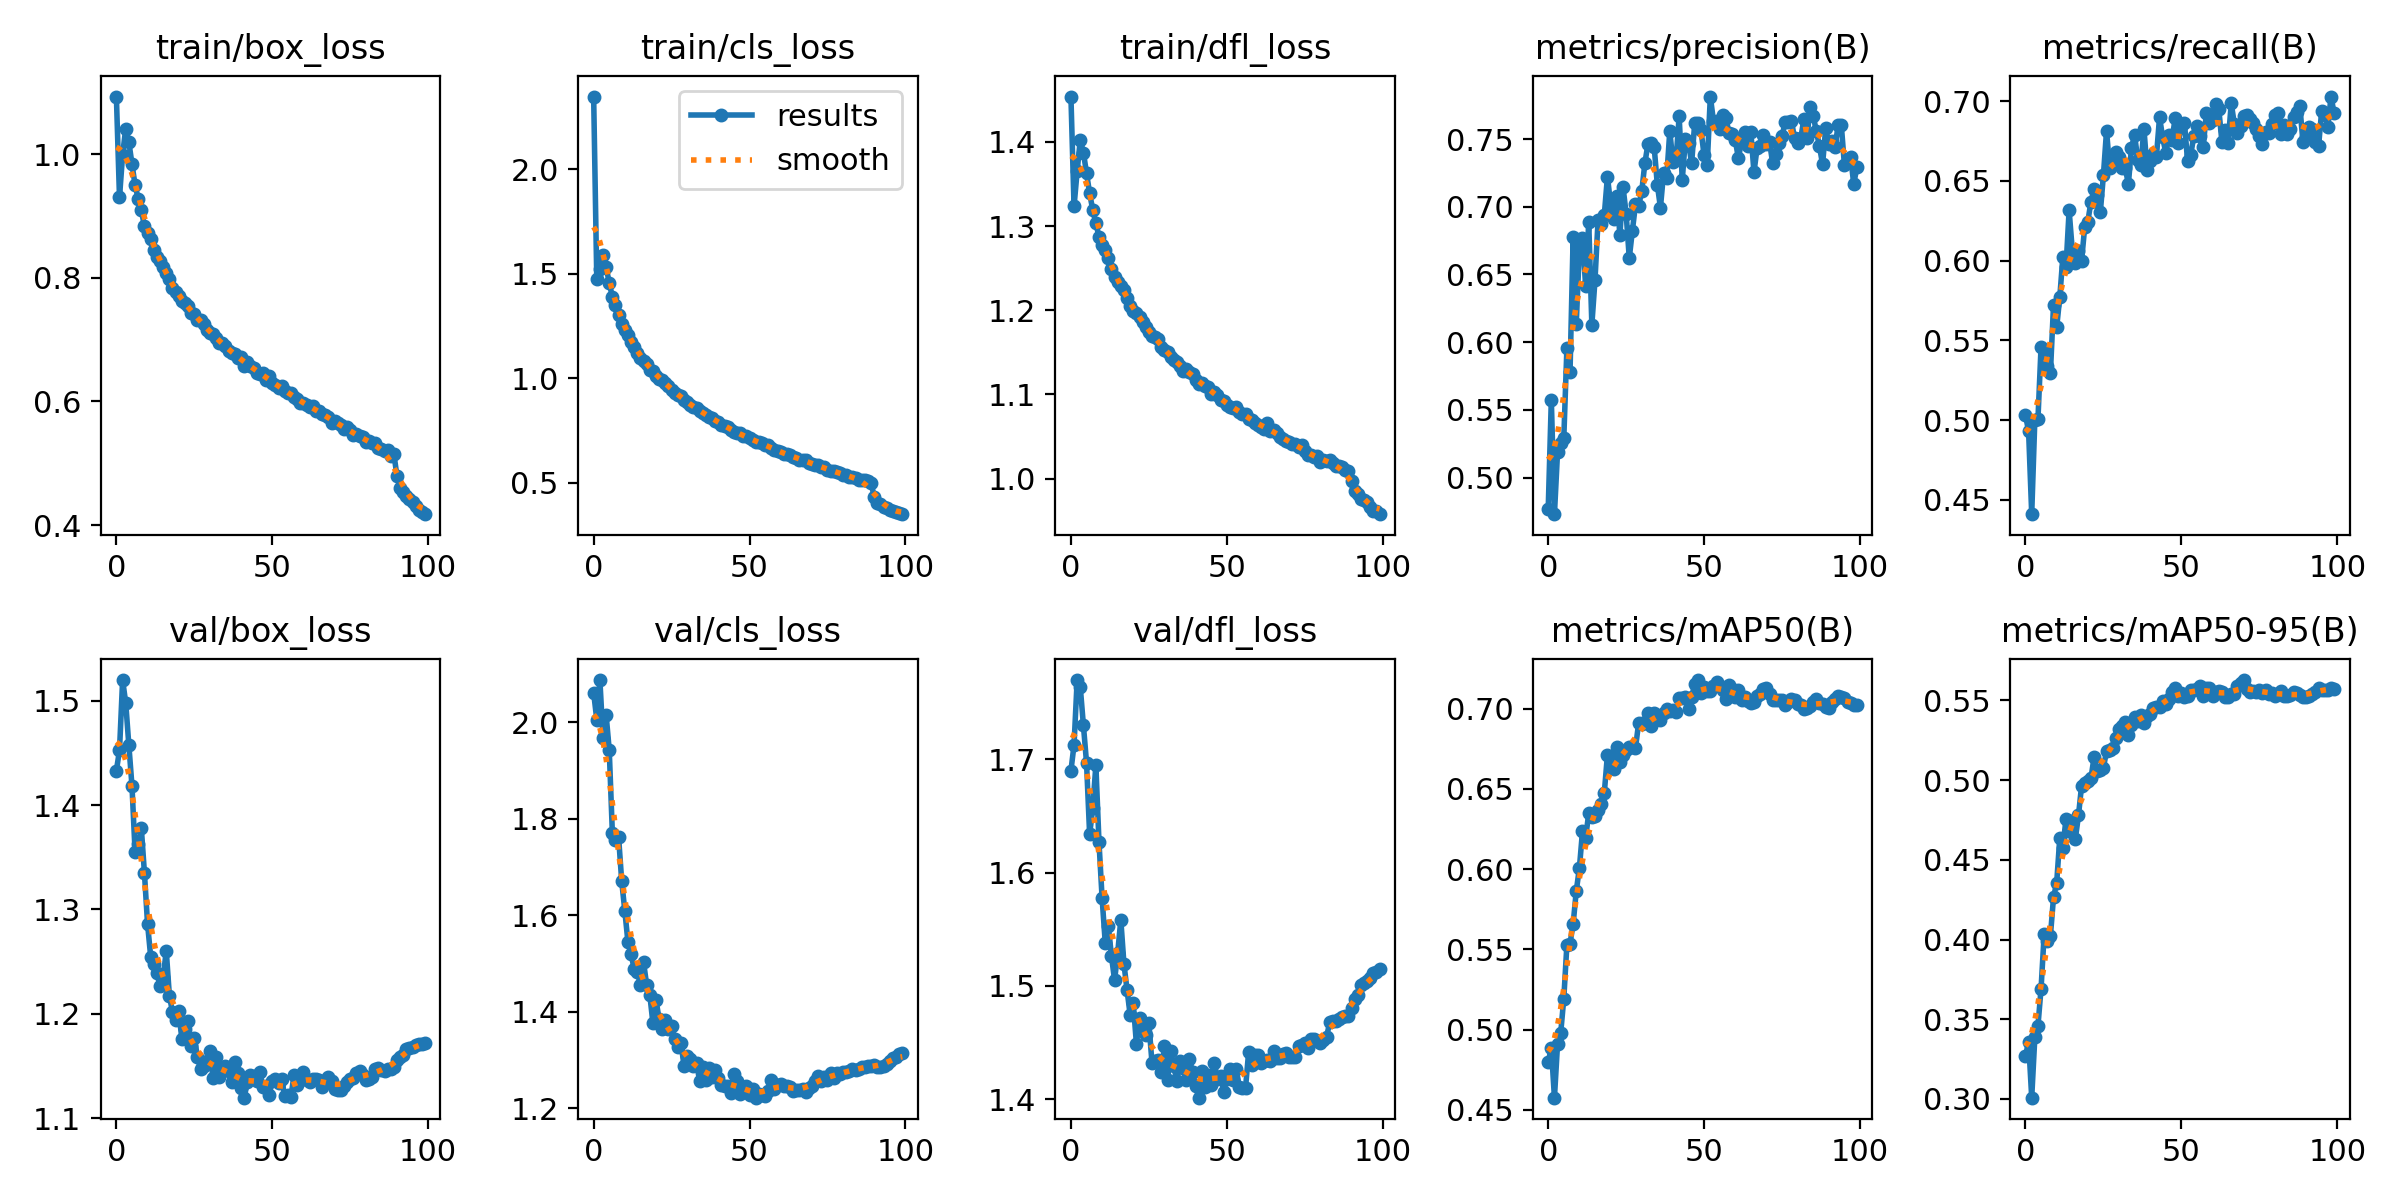

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1200)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients
val: Scanning /content/datasets/is_it_damaged-7/valid/labels.cache... 887 images, 0 backgrounds, 0 corrupt: 100% 887/887 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 56/56 [00:10<00:00,  5.47it/s]
                   all        887       2485      0.764      0.687      0.715      0.572
            background        887        575      0.632       0.73      0.658      0.516
                 crack        887        189      0.571      0.344      0.378      0.209
                  dent        887        543      0.704      0.522      0.595      0.351
         glass shatter        887        173      0.982       0.97      0.984       0.93
           lamp broken        887        146      0.878      0.801      0.885      0.761
               scratch  

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients
val: Scanning /content/datasets/is_it_damaged-8/valid/labels.cache... 887 images, 0 backgrounds, 0 corrupt: 100% 887/887 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 56/56 [00:10<00:00,  5.54it/s]
                   all        887       2485      0.743      0.692      0.712      0.562
            background        887        575      0.622      0.729      0.656       0.51
                 crack        887        189      0.513      0.318      0.346      0.175
                  dent        887        543      0.675      0.532      0.584      0.343
         glass shatter        887        173      0.971      0.977      0.974        0.9
           lamp broken        887        146      0.882      0.829      0.903       0.78
               scratch  

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/martin-rpfil/is_it_damaged/8
Share your model with the world at: https://universe.roboflow.com/martin-rpfil/is_it_damaged/model/8


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 000471_jpg.rf.ef515cf7d301fc442627871af3fe7533.jpg


HTTPError: ignored

In [ ]:
!zip -r runv8_2.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/roboflow_deploy.zip (stored 0%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 8%)
  adding: content/runs/detect/train/labels.jpg (deflated 20%)
  adding: content/runs/detect/train/train_batch47161.jpg (deflated 9%)
  adding: content/runs/detect/train/P_curve.png (deflated 6%)
  adding: content/runs/detect/train/args.yaml (deflated 51%)
  adding: content/runs/detect/train/F1_curve.png (deflated 6%)
  adding: content/runs/detect/train/PR_curve.png (deflated 7%)
  adding: content/runs/detect/train/events.out.tfevents.1694413912.5a5458ec420b.2994.0 (deflated 73%)
  adding: content/runs/detect/train/model_artifacts.json (deflated 63%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 8%)
  adding: content/runs/detect/train/R_curve.png (deflated 6%)
  adding: content/runs/detect/train/confusio

In [ ]:
!unzip -u "/content/runs.zip" -d "/content/"

Archive:  /content/runs.zip
   creating: /content/runs/
   creating: /content/runs/detect/
   creating: /content/runs/detect/val/
  inflating: /content/runs/detect/val/val_batch1_pred.jpg  
  inflating: /content/runs/detect/val/P_curve.png  
  inflating: /content/runs/detect/val/confusion_matrix.png  
  inflating: /content/runs/detect/val/confusion_matrix_normalized.png  
  inflating: /content/runs/detect/val/val_batch2_labels.jpg  
  inflating: /content/runs/detect/val/F1_curve.png  
  inflating: /content/runs/detect/val/PR_curve.png  
  inflating: /content/runs/detect/val/R_curve.png  
  inflating: /content/runs/detect/val/val_batch0_pred.jpg  
  inflating: /content/runs/detect/val/val_batch0_labels.jpg  
  inflating: /content/runs/detect/val/val_batch1_labels.jpg  
  inflating: /content/runs/detect/val/val_batch2_pred.jpg  
   creating: /content/runs/detect/train/
  inflating: /content/runs/detect/train/model_artifacts.json  
  inflating: /content/runs/detect/train/train_batch2.jpg 

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model.export(format='tflite')

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients

PyTorch: starting from /content/runs/detect/train/weights/best.pt with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 11, 13125) (21.5 MB)
requirements: Ultralytics requirements ('onnx', 'onnx2tf>=1.7.7', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.17', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu') not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 269.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.9/392.9 kB 332.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 136.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 227.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 155.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 7.7s, saved as /content/runs/detect/train/weights/best.onnx (42.7 MB)

TensorFlow SavedModel: running 'onnx2tf -i /content/runs/detect/train/weights/best.onnx -o /content/runs/detect/train/weights/best_saved_model -nuo --non_verbose'
TensorFlow SavedModel: export success ✅ 53.5s, saved as /content/runs/detect/train/weights/best_saved_model (106.9 MB)

TensorFlow Lite: starting export with tensorflow 2.13.0...
TensorFlow Lite: export success ✅ 0.0s, saved as /content/runs/detect/train/weights/best_saved_model/best_float32.tflite (42.7 MB)

Export complete (54.1s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=800 
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=800 data=/content/datasets/is_it_damaged-8/data.yaml 
Visualize:       https://netron.app


In [ ]:
!pip install tensorflow-model-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 4.9 MB/s eta 0:00:00
